### Please fill this part


1.   Full Name: <span style="color:red"> $Hadis$ $Ahmadian$ </span>
2.   Student Number:<span style="color:red"> $400211524$ </span>


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

# Support Vector Machine (SVM)- (30+5pts)

In [1]:
# You are not allowed to import other packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import cvxopt

#### About the Data:
Heart diseases, also known as [Cardiovascular diseases (CVDs)](https://en.wikipedia.org/wiki/Cardiovascular_disease), are the first cause of death worldwide, taking an estimated 17.9 million lives each year which is about 32% of all deaths all over the world. 

In the present HomeWork, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

For this perpose, `Heart_Disease_Dataset.csv` file can be used that is attached to the HomeWork folder. Use `Dataset_Description.pdf` for more detail.

In [2]:
df = pd.read_csv("./Heart_Disease_Dataset.csv") 

### Pre-Processing - (3pts)

#### Exploratory Data Analysis (EDA):
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

shape of dataset is:  (1190, 12)
this dataset has not missing value
ballanced: True
--------------------- Plots --------------------------


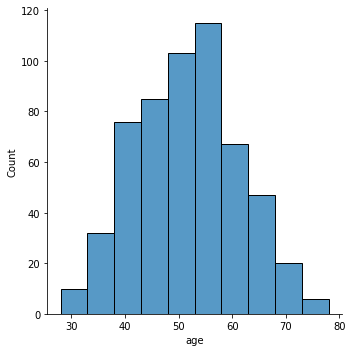

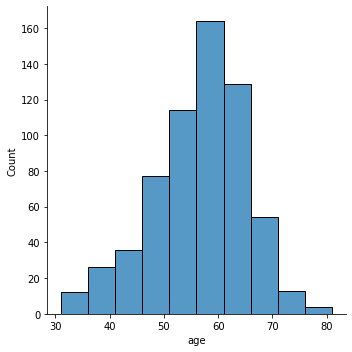

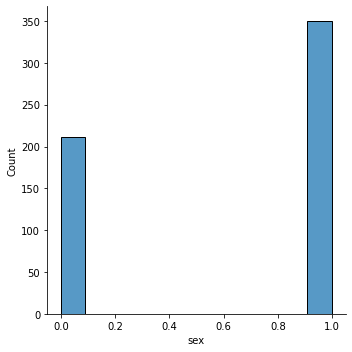

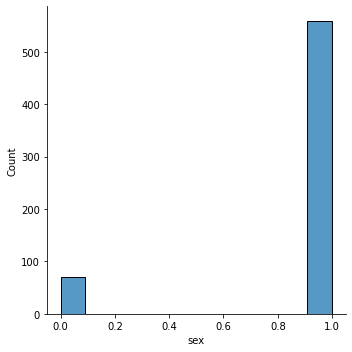

In [3]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ##
###############################################################################
shape = df.shape
print("shape of dataset is: " , shape)

###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
###############################################################################
missings = None
missings=[]# saves columns of missing data
for c in df:
    n= df[c].isnull() # for every column, checks if a row has a missing value
    for d in n:
        if d==True:#if we find a missing value in column c, we save the columns name as a column with missing value 
            missings.append(c) 
            break
if missings==[]:
    print("this dataset has not missing value")
else:
    print("this dataset has missing values at columns:",missings) #if any values are missing, I print their columns

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
## If the difference between 2 classes was less than 100 for our dataset,    ##
## it is called "ballanced".                                                 ##
###############################################################################
c1=0 # number of data in classe 1
c0=0 #number of data in class 0
for d in df['target']:
    if d==1:
        c1+=1
    else:
        c0+=1
res= (abs(c0-c1)<100) #true if |c0-c1|<100 --> balanced
print("ballanced:", res)

###############################################################################
## TODO: plot the age distirbution and gender distrbution for both normal    ##
## and heart diseses patients.(4 plots)                                      ##
###############################################################################
print("--------------------- Plots --------------------------")
#splitting data frame in two parts, those with target=0 and target=1
df0=df[df['target']==0]
df1=df[df['target']==1]

#drawing distribiution of age on both healthy and risked with binwidth=5
sns.displot(df0, x="age", binwidth=5)

sns.displot(df1, x="age", binwidth=5)

#drawing distribiution of sex on both healthy and risked
sns.displot(df0, x="sex")

sns.displot(df1, x="sex")

#### Question 1: What do you conclude from the plots?(2pts)
#### Answer: 
<span style="color:red"> AGE: </span>
<span style="color:blue"> in people with heart disease, we have more samples with higher ages, meaning the risk of heart diseas increases as age increases. most of healthy samples are in range 40-55 but most of risked samles are in range 55-65. Also it is of note that both distribiutions look like a normal distribution, meaning more samples in the mean range and les samples as we go to very high or very low ages </span>

<span style="color:red"> SEX: </span>
<span style="color:blue"> in both categories, we have more male cases, however in people with heart disease, male cases are noticeably higher, it can be concluded that males are in higher risk of heart diseas. </span>

#### Outlier Detection & Removal (3pts):
We will filter ouliers using Z-test.

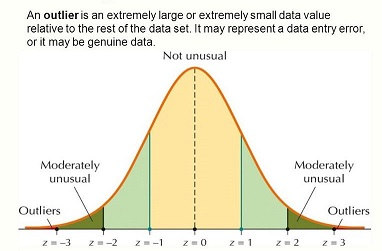

Z-test formula:
\begin{equation*}
    Z = \bigg|\frac {x - mu} {std}\bigg|
\end{equation*}

In [4]:
################################################################################
## TODO: Suppose that, based on our prior knowledge, we know some columns have##
## outliers. Calculate z-score for each featuer and determine the outliers    ##
## with threshold=3, then eliminate them. Target dataframe has(1173,12)shape. ##
################################################################################
columns = ["age","resting bp s","cholesterol","max heart rate"]
threshold = 3

for c in columns:
    df['z'] = ( df[c] - df[c].mean() ) / df[c].std() # add a column for calculating z_score of each column
    df = df[abs(df['z'])<threshold] #delete rows with |z_score|<3
    
del df['z'] #delete z score column

df.shape #final shape

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

(1173, 12)

#### Feature Engineering(2pts):
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.


In [5]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized. type of features is ##
## determined in dataset description file.                                    ##
################################################################################

columns = ["age","resting bp s","cholesterol","max heart rate","oldpeak"] #these are columns with numeric values

for c in columns: # for every numeric column:
    df[c]=(df[c]-df[c].min())/(df[c].max()-df[c].min()) #normalize its values with MIN-MAX normalizaation
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

### SVM - (18pts)

#### spliting data

In [6]:
# The original dataset labels is 0 and 1 and in the following code we change it to -1 and 1. 
df.target.replace(0 , -1 , inplace = True) 

# Turn pandas dataframe to numpy array type
df = df.to_numpy()

# Splitting data into train and test part. 70% for train and 30% for test
train = df[:int(len(df) * 0.7)]
test = df[int(len(df) * 0.7):]

# Getting features 
X_train = train[: , :-1]
y_train = train[: , -1]

# Getting labels
X_test = test[: , :-1]
y_test = test[: , -1]

# shapes should be: 
# Train: (821, 11) (821,)
# Test: (352, 11) (352,)
print("Train: ", X_train.shape ,y_train.shape)
print("Test: " ,X_test.shape ,y_test.shape)


Train:  (821, 11) (821,)
Test:  (352, 11) (352,)


#### SVM Using sklearn:
Use the standard libarary SVM classifier (SVC) on the training data, and then test the classifier on the test data. You will need to call SVM with 3 kernels: (1) Linear, (2) Polynomial and (3) RBF. You can change C to achive better results. For "RBF" find "gamma" witch takes 90% accuracy, at least. For polynomial kernel you are allowed to change "degree" to find best results.

For each kernel, reportting the followings is required:
Accuracy, Precision, Recall, F1score.

In [7]:
def classification_report(y_true, y_pred):
    #################################################################################
    ## TODO: Define a function that returns the followings:                        ##
    ## Accuracy, Precision, Recall, F1score.                                       ##
    #################################################################################
    
    TP=0 #True Positive count
    FP=0 #False Positive count
    TN=0 #True Negative count
    FN=0 #False Negative count
    
    
    #counting every case : TP,FN,FP,TN
    for i in range(len(y_pred)):
        if y_pred[i]==1 and y_true[i]==1: 
            TP+=1
        elif y_pred[i]==-1 and y_true[i]==-1:
            TN+=1
        elif y_pred[i]==1 and y_true[i]==-1:
            FP+=1
        else:
            FN+=1

    # calculating accuracy, precision by using above values and then Recall and F1 score with precision and recall
    Accuracy = (TP+TN)/(TP+TN+FN+FP) 
    Precision = (TP)/(TP+FP)
    Recall = (TP)/(TP+FN)
    F1score = (2*Precision*Recall)/Precision+Recall
    #################################################################################
    #                                 END OF YOUR CODE                              #
    #################################################################################
    return "Accuracy:",Accuracy,"Precision:", Precision, "Recall:",Recall, "F1score:",F1score

In [8]:
#########################################################################################
## TODO: Use svm of sklearn package (imported above) with 3 kernels.                   ##
## You should define model, fit using X_train, predict using X_test.                   ##
## your predictions known as y_pred.                                                   ##
## then use classification_report function to evaluate model.                          ##
#########################################################################################

# linear kernel
svclassifier = SVC(kernel='linear') # svm classifier with linear kenrel
svclassifier.fit(X_train, y_train) #fit above classifier
y_pred = svclassifier.predict(X_test) #predict by fitted model

print("results of sklearn svm linear kernel:\n", classification_report(y_test, y_pred)) #printing results



# same as above, only with polynomial kernel
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

print("results of sklearn svm polynomial kernel:\n", classification_report(y_test, y_pred))



# same as above, only with rbf kernel
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print("results of sklearn svm RBF kernel:\n", classification_report(y_test, y_pred))


#########################################################################################
#                                      END OF YOUR CODE                                 #
#########################################################################################

results of sklearn svm linear kernel:
 ('Accuracy:', 0.7869318181818182, 'Precision:', 0.7756410256410257, 'Recall:', 0.7515527950310559, 'F1score:', 2.2546583850931676)
results of sklearn svm polynomial kernel:
 ('Accuracy:', 0.7840909090909091, 'Precision:', 0.8014184397163121, 'Recall:', 0.7018633540372671, 'F1score:', 2.1055900621118013)
results of sklearn svm RBF kernel:
 ('Accuracy:', 0.7698863636363636, 'Precision:', 0.7439024390243902, 'Recall:', 0.7577639751552795, 'F1score:', 2.2732919254658386)


#### SVM:
Now that you know how the standard library SVM works on the dataset, attempt to implement your own version of SVM. Implement SVM using Quadratic Programming(QP) approach. Remember that SVM objective fuction with QP is:

\begin{equation*}
    min_{\alpha}\quad\frac{1}{2}\alpha^T\,Q\,\alpha-1^T\,\alpha\\
    s.t.\qquad y^T\,\alpha=0,\,\alpha\ge0
\end{equation*}

where:
\begin{equation*}
    Q_{i,j}=y_i\,y_j\,\langle x_i\,,\,x_j\rangle
\end{equation*}

and:
\begin{equation*}
    \text{if}\;(\alpha_n>0)\;\text{then}\;x_n\;\text{is a  support vector}
\end{equation*}

For this perpose, complete the following code. You are allowed to use "cvxopt" package. It's an optimization package for Quadratic Programming. Below is the user's guide for the QP from CVXOPT:

[Quadratic Programming](https://cvxopt.org/userguide/coneprog.html#quadratic-programming)

In [9]:
# Hide cvxopt output
cvxopt.solvers.options["show_progress"] = False

#####################################################################################
## TODO: Use the information from the lecture slides to formulate the SVM          ##
## kernels. These kernel functions will be called in the SVM class.                ##
#####################################################################################

def linear_kernel(z,x):
    return np.dot(z.T,x)

def polynomial_kernel(z,x): # (Z_transpose.X+1)^p --> polynomial kernel
    p=7
    return (np.dot(x.T,z)+1)**p

def rbf_kernel(z,x): # exp(-((||Z-X||^2)^2)/(2sigma^2)) --> rbf kernel
    sigma=5
    return np.exp(-1*(np.linalg.norm(z-x)**2)/(2*(sigma**2)))

#####################################################################################
#                                   END OF YOUR CODE                                #
#####################################################################################


class MySVM(object):
    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        #####################################################################################
        ## TODO: Compute Gram matrix "K" for the given kernel.                             ##
        #####################################################################################        
        K=[[0]*len(X) for _ in range(len(X))] #initialize K
        for i in range(len(X)):
            for j in range(len(X)):
                K[i][j]=self.kernel(X[i],X[j]) #compute each element of k using chosen kernel

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################


        #####################################################################################
        ## TODO: Setup SVM objective function in QP form (Notation from attached link).    ##
        ## Guidance: G and h have defferent definition if C is used or not.                ##
        #####################################################################################
        y=np.array([y]).T
        u=y*X
        P = cvxopt.matrix(np.dot(u,u.T)) # p= (y*x).(y*x)_transpose
        q = cvxopt.matrix(np.repeat([-1.0], len(X))[..., None]) # q= a np araray with shape (m,1) filled with -1
        A = cvxopt.matrix(y.reshape(1, -1)) # A is y reshaped by (1,unknown)
        b = cvxopt.matrix(0.0) #b=0
        G = cvxopt.matrix(-1*(np.eye(len(X)))) #G= -I (I is unite matrix) --> -1
        h = cvxopt.matrix(np.zeros(len(X))) # h= 0s by len of len(X)

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        alpha = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = alpha > 1e-5

        #this will actually give the indices of the support vectors
        ind = np.arange(len(alpha))[sv]

        # get alphas of support vector , Xs and ys too.
        self.alpha = alpha[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        #####################################################################################
        ## TODO: Compute the Intercept b and Weight vector w.                              ##
        #####################################################################################
        
        W=np.dot((y * alpha).transpose(), X) # calculate W matrix using y, alpha and X
        W=W[0]
        
        # Intercept
        XW=np.dot(X[sv], W.reshape(-1,1))
        self.b = np.mean(y[sv] - XW) # calculatin b using support vectors (mean (y[support vectors]- predicted y))
        
        # Weight vector
        if self.kernel == linear_kernel:
            self.w = W # set the calculated W
        else:
            self.w = None #Guidance: for non-linear case this should be None. (do not change)
            
        
        
        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

    def predict(self, X):
        if self.w is not None:
            return np.sign(np.dot(X, self.w) + self.b)
        else:
        #####################################################################################
        ## TODO: For non-linear case, implement the kernel trick to predict the label.     ##
        #####################################################################################
            
            
            y_predict=[]
            
            for k in range(len(X)):
                pred=0
                for i in range(len(self.alpha)):
                    # y_pred for x=z : Σ (α[i]*Y[i]*K(z,x[i])) for i in support vectors
                    pred+=self.alpha[i]*self.sv_y[i]*self.kernel(X[k],self.sv[i]) 
                y_predict.append(pred)
            

            # (y[support vector 0]- predicted y sv0))

            pred=0
            for i in range(len(self.alpha)):
                pred+=self.alpha[i]*self.sv_y[i]*self.kernel(self.sv[0],self.sv[i])
                    
            self.b = self.sv_y[0]-pred
            return np.sign(y_predict + self.b)

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

In [10]:
###################################################################################
## TODO: define 3 model same as previous part (SVM Using sklearn) and evaluate   ##
## them. Note that for comaparing your result with that part for each kernel use ##
## same parameters in both parts.                                                ##
###################################################################################

# linear kernel
svm=MySVM(linear_kernel) #defining model and its kernel
svm.fit(X_train,y_train) #fit model
y_pred=svm.predict(X_test) #predict using fitted model
print("results of MySVM linear kernel:", classification_report(y_test , y_pred))

#following are same as above only with other kernels

# polynomial kernel
svm=MySVM(polynomial_kernel)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

print("results of MySVM polynomial kernel:", classification_report(y_test , y_pred))


# rbf kernel
svm=MySVM(rbf_kernel)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print("results of Mysvm RBF kernel:", classification_report(y_test , y_pred))

results of MySVM linear kernel: ('Accuracy:', 0.7727272727272727, 'Precision:', 0.7189189189189189, 'Recall:', 0.8260869565217391, 'F1score:', 2.4782608695652173)
results of MySVM polynomial kernel: ('Accuracy:', 0.5028409090909091, 'Precision:', 0.4639175257731959, 'Recall:', 0.5590062111801242, 'F1score:', 1.6770186335403725)
results of Mysvm RBF kernel: ('Accuracy:', 0.5596590909090909, 'Precision:', 0.51, 'Recall:', 0.9503105590062112, 'F1score:', 2.8509316770186337)


#### Question 2: Report best results (2pts).



1.  Best kernel: <span style="color:blue">linear</span>
2.  Best Accuracy:<span style="color:blue"> 0.7869318181818182</span>

<span style="color:purple"> NOTE: decreasing accuracy in poly and rbf kernel in my versoion of svm is probably for the problem of overfitting in kernels</span>


### Bonus Score - (5pts)

In this step you can check other kernel functions or change parameters or any idea to get better result in compare with last section's results.

#  Naïve Bayes and Bayes- (20pts)

In this section, you will complete the functions that you will use to answer the sections of the first question.

Note: `In general, functions should have the said operation, but you can change the inputs as desired`.

Note: In this question, we intend to predict heart patients from pre-prepared data (`Heart_Disease_Dataset.csv`). In this data, consider features that have more than 5 unique numbers continuously and consider the rest of the features as discrete.



## Questions:
Q1) First consider discrete features as independent and continuous features as a normal multivariate distribution. With this assumption, train the Bayesian classifier and report the F1-sⅽore, Aⅽⅽuraⅽy, Preⅽision and Reⅽaⅼⅼ metrics (using `classification_report` function) on the train and test data. 

Q2) Assume all the features are independent and train a Naïve Bayes classifier and report the mentioned metrics on the test data.`Consider the distribution of continuous variables to be normal`.

Q3) By plotting the normal distribution diagram obtained for each of the continuous variables in the previous section, check the effectiveness of each in the Naïve Bayes classifier and compare them with each other.

Q4) Assuming that classifying an unhealthy person `(target==1)` in the healthy category costs twice as much, retrain the Naïve Bayes classifier and compare the Aⅽⅽuraⅽy metric with the part `2`.

### Note : Now answer the questions in parts 1 to 4 using following functions

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy 
%matplotlib inline

The `normal_param` function takes as input a DataFrame whose all columns have continuous values and returns the columns of the multivariate normal distribution parameters 

In [12]:
def normal_params(df):
    return  np.mean(df, axis=0),np.cov(df, rowvar=0) # returning mean and covariance matrices for a dataframe

The following function `p_x_normal` returns the probability of seeing that vector by taking a vector of continuous features and normal multivariate distribution parameters.

In [13]:
def p_x_normal(x, params):
    m=params[0] #mean matrix
    c=params[1] # covariance matrix
    in_c=np.linalg.inv(c) #Cov inverse matrix
    x_m=(x-m) 
    det_c=np.linalg.det(c) #determinante of c
    p=np.pi #pi=3.14....
    
    #calculating and returning the probability density of point x with parameters params 
    #using multivariante normal dist formula 
    prob=np.dot(x_m.T,in_c)
    prob=np.dot(prob,x_m)
    k=len(x)
    return ((np.exp((-1/2)*(prob))))/((np.sqrt(((2*p)**k)*det_c)))
     

The `cat_params` function, by taking a DataFrame and name of a discrete column from it, returns the probability of seeing each of its unique values.

In [14]:
def cat_params(df, col):
    # probability of value a is number of times a is seen devided by number of all samples
    n=df[col].shape[0]
    (unique, counts) = np.unique(df[col], return_counts=True)
    prob = np.asarray((unique, counts/n)).T
    return dict(prob)

The `p_x_cat` function returns the probability of being seen by taking a vector of discrete features and a DataFrame.

In [15]:
def p_x_cat(df, x):
    p=1
    i=0
    for a in x:
        #probability of a vector X is : Π p(x_i)
        p*=cat_params(df,i)[a]
        i+=1
    return p

The `p_x_multivariate` function returns the probability of seeing that vector by taking a DataFrame, the parameters required for continuous and discrete distributions, and a vector of properties.

In [16]:
def p_x_multivariate(df, x,params):
    
    
    df_des=df.T[[1,2,5,6,8,10]] #descrete columns
    x_des=x.T[[[1,2,5,6,8,10]]].T #descrete featurs
    x_con=x.T[[0,3,4,7,9]].T #continues columns
    
    # P= p(continues)*p(descrete)
    p=p_x_normal(x_con,params)
    p*=p_x_cat(df_des,x_des)
    
    return p

The following function takes a DataFrame and name of a continuous column as its input and returns the normal distribution parameters of that column.

In [17]:
def single_normal_param(df):
    return  np.mean(df, axis=0),np.cov(df, rowvar=0) # returning mean and variance for a dataframe

The following function takes a number and returns the probability of being seen according to its normal distribution parameters.

In [18]:
def p_single_normal(x, params):
    mean=params[0] #mean
    s=np.sqrt(params[1]+0) #std
    #calculating and returning the probability density of point x with parameters params 
    #using normal dist formula 
    return np.exp(-1/2*((x-mean)/2*s)**2)/(np.sqrt(2*np.pi)*s)


The following function is the same as before, but this time assuming the independence of all properties by taking a DataFrame, the parameters required for continuous and discrete distributions and a vector of featuress return the probability that that vector is seen in the output.

In [19]:
def p_x_single(df, x):
    df_des=df.T[[1,2,5,6,8,10]] # descrete columns of data frame
    df_con=df.T[[0,3,4,7,9]]# continious columns of data frame
    x_des=x.T[[[1,2,5,6,8,10]]].T# features columns of data frame
    x_con=x.T[[0,3,4,7,9]] # features columns of data frame
    p=1
    #P(X)=Π p(x_i)*Π p(x_j) 
    #i= continous columns and j=descrete columns
    for i in range(len(x_con)):
        p*=p_single_normal(x_con[i],single_normal_param(df_con[i]))
    p*=p_x_cat(df_des,x_des)
    
    return p
    

### Q1

In [20]:
#################################################################################
#                                    TODO                                       #
#################################################################################
t_1=[] #positive sample index of df
t_n1=[] # negative sample index of df
for i in range(len(y_train)):
    if y_train[i]==1:
        t_1.append(i)
    else:
        t_n1.append(i)

# calculating Priors of each class
n=y_train.shape[0]
(unique, counts) = np.unique(y_train, return_counts=True)
p_c = dict(np.asarray((unique, counts/n)).T) 

df_1=df[t_1]#positive sample of df
df_n1=df[t_n1]#negative sample index of df

#continoious columns of each part of 1 an -1 of df
df_con_1=df_1.T[[0,3,4,7,9]].T
df_con_n1=df_1.T[[0,3,4,7,9]].T

# parameters of liklihoods for each class for continoius columns
param_1=normal_params(df_con_1)
param_n1=normal_params(df_con_n1)

y_pred=[]

for x in X_test:
    #calculating liklihhods
    p_x_c_1=p_x_multivariate(df_1,x,param_1)
    p_x_c_n1=p_x_multivariate(df_n1,x,param_n1)
    # liklihood * prior = postrior
    p_1=p_x_c_1*p_c[1]
    p_n1=p_x_c_n1*p_c[-1]
    
    #check wich of postriors are higher and decide for classification
    if p_1>p_n1:
        y_pred.append(1)
    else:
        y_pred.append(-1)

print("Bayse classifier, multivariant:")
classification_report(y_test,y_pred)

c:\windows\system32\opencv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


Bayse classifier, multivariant:


('Accuracy:',
 0.7698863636363636,
 'Precision:',
 0.7469135802469136,
 'Recall:',
 0.7515527950310559,
 'F1score:',
 2.2546583850931676)

### Q2

In [21]:
#################################################################################
#                                    TODO                                       #
#################################################################################


y_pred=[]

for x in X_test:
    p_x_c_1=p_x_single(df_1,x) #liklihood for target +
    p_x_c_n1=p_x_single(df_n1,x)# liklihood for target -
    # postrior = prior*liklihood
    p_1=p_x_c_1*p_c[1]
    p_n1=p_x_c_n1*p_c[-1]
    
    #check wich of postriors are higher and decide for classification
    if p_1>p_n1:
        y_pred.append(1)
    else:
        y_pred.append(-1)

print("Naïve Bayes, single")
classification_report(y_test,y_pred)

c:\windows\system32\opencv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


Naïve Bayes, single


('Accuracy:',
 0.7698863636363636,
 'Precision:',
 0.8225806451612904,
 'Recall:',
 0.6335403726708074,
 'F1score:',
 1.9006211180124222)

### Q3

mean: 0.5244706578283487 std: 0.19114716717929497
mean: 0.49333008565745134 std: 0.16356116766348522
mean: 0.4265821444135965 std: 0.20067179752426656
mean: 0.5395724795554293 std: 0.18715746878077716
mean: 0.399974812059211 std: 0.1230625966522194


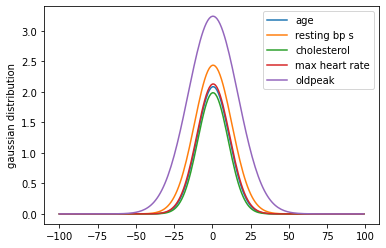

In [31]:
#################################################################################
#                                    TODO                                       #
#################################################################################

df_con=df.T[[0,3,4,7,9]] #continious columns
for i in range(len(df_con)):
    #calculating mean and std for each continious feature
    p=single_normal_param(df_con[i])
    mean = p[0]; std = 1; s = np.sqrt(p[1]+0)
    print("mean:",mean,"std:",s)
    
    #plot each normal distribiution
    x = np.arange(-100,100,1)
    f=np.exp(-1/2*((x-mean)/2*s)**2)/(np.sqrt(2*np.pi)*s)
    plt.plot(x,f)

#show plot
plt.legend(["age","resting bp s","cholesterol","max heart rate","oldpeak"])
plt.ylabel('gaussian distribution')
plt.show()

<span style="color:blue">higher the density of mean, means more effectivens so sorting this features in order of effectiveness we'll have:
$\text{old peak > resting bp s > max heart rate > age > cholestrol}$</span>

### Q4

In [23]:
#################################################################################
#                                    TODO                                       #
#################################################################################

y_pred=[]

for x in X_test:
    p_x_c_1=p_x_single(df_1,x)
    p_x_c_n1=p_x_single(df_n1,x)
    p_1=p_x_c_1*p_c[1]
    p_n1=p_x_c_n1*p_c[-1]
    
    
    # we have a multipilication by 2 in p_n1 to effect the diffrent cost for decision 
    if p_1>2*p_n1:
        y_pred.append(1)
    else:
        y_pred.append(-1)
        
classification_report(y_test,y_pred)

c:\windows\system32\opencv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


('Accuracy:',
 0.7613636363636364,
 'Precision:',
 0.8468468468468469,
 'Recall:',
 0.5838509316770186,
 'F1score:',
 1.7515527950310559)

# Ensemble Learning- (20pts)

We want to implement forest Random. To train each tree in the forest, set the value of x to 'sqrt'. Then explain the reason for this decision? 

Note: must be use `bootstrap sampling`. 

Now increase the number of trees from 20 to 200. Draw the training and validation error according to the number of trees. `(Using bootstrap sampling library is not prohibited)`

<span style="color:blue">reason we use only $\sqrt{x}$ of features is that it makes the correlation of trees less and so the accuracy, higher. if we used all of featurs, it decreased randomness, trees would have more correlation and so less accuracy. between numbers of features that we can use, sqrt of them is a very wise choice, not too high so not risky for correlation and not to low so that results in too weak trees.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

The following function takes the features and the target vector and returns the trained decision tree using Sklearn.

In [25]:
def train_tree(X, y):
    # make a tree and fit it to x , y
    t = DecisionTreeClassifier()
    t = t.fit(X, y)
    return t

The following function takes a random tree, a features vector, the target vector, and the decision result of the previous trees in the forest, and updates and returns the decision result. It also updates the error of the whole set so far.

In [26]:
def one_tree_predict_random_forest(tree, X, y,res):
    #predict using fitted tree
    yp=tree.predict(X)
    # update results
    for i in range(len(yp)):
        res[i][yp[i]]+=1
    return res

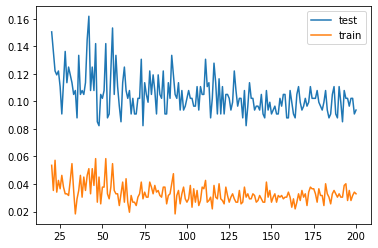

In [27]:
# f_val is a function that does voting for final results
def f_val(r):
    if r[-1]>r[1]:
        return -1
    else:
        return 1
#these indies are going to be used for bootstraping and feature selection 
inds=[i for i in range(len(X_train))]
f_inds=[i for i in range(11)]

# number of trees changing from 20 t0 200
rounds = np.arange(20,201,1)

#save error for each forest
xp=[]
xp_train=[]

for ro in rounds:
    #these are going to be used to save each trees result
    res=[{-1:0,1:0} for _ in range(len(X_test))]
    res_train=[{-1:0,1:0} for _ in range(len(X_train))]
    
    for _ in range(ro):
        #bootsraping indices
        bs_inds = np.random.choice(inds,replace=True, size=int(len(X_train)))
        # sqrt(x) features to be selected
        feature_inds = np.random.choice(f_inds,replace=False, size=int(np.sqrt(len(f_inds))))
        
        #seperating train set of forest using indicies calculated
        x_tmp=X_train[bs_inds]
        x=[]
        for f in  x_tmp:
            x.append(f[feature_inds])
        x=np.array(x)
        y=y_train[bs_inds]
    
        #train the tree
        t=train_tree(x, y)
        
        #test tree on X_test (selected features) and update results of test
        x=[]
        for f in  X_test:
            x.append(f[feature_inds])
        x=np.array(x)
        res=one_tree_predict_random_forest(t,x,y_test,res)
        
        #test tree on X_train (selected features) and update results on train set
        x=[]
        for f in  X_train:
            x.append(f[feature_inds])
        x=np.array(x)
        res_train=one_tree_predict_random_forest(t,x,y_train,res_train)
    
    # do final prediction on test and train for current forrest and save their eeror
    p_final=[f_val(r) for r in res]
    p_f_train=[f_val(r) for r in res_train]
    xp.append(1-classification_report(y_test,p_final)[1])
    xp_train.append(1-classification_report(y_train,p_f_train)[1])

#show plot of error on test and train
plt.plot(rounds,xp)
plt.plot(rounds,xp_train)
plt.legend(["test","train"])
plt.show()

<span style="color:blue"> we can see two things:
    
<span style="color:blue">1) the error on training is always less than on validation set wich sounds logical.
    
<span style="color:blue">2) error tends to decrease with increasing number of trees (however because of the randomness of choises in each step, this decrese in not strictly descending
    
    

<span style="color:red"> best accuracy and the smallest number of trees that has that accuracy:
    <span style="color:blue">(the reason I chose smallest number of trees for the best accuracy is Occam's rule :
    The use of Occam's razor dates back to William of Ockham in the 1200s – it's the idea that the simplest and most direct solution should be preferred, or that with different hypotheses, the simplest one or the one with fewest assumptions will be best applied.)

In [28]:
print("best accuracy on test =", 1-min(xp))
print("number of trees = ",rounds[xp.index(min(xp))]) 

best accuracy on test = 0.9176136363636364
number of trees =  48
